# Manim Cheat Sheet: Movement, Shift, and Rotation

---

## 1️⃣ Object Movement

| Action                 | Method / Function                              | Notes |
|------------------------|-----------------------------------------------|-------|
| Move to specific point | `mobject.move_to(point)`                       | Absolute positioning; sets center of object to `point`. |
| Move relative          | `mobject.shift(vector)`                        | Moves object by a vector from its current position. |
| Align to edge          | `mobject.to_edge(direction, buff=0.5)`        | Place object at top, bottom, left, right, or combinations. |
| Align to corner        | `mobject.to_corner(corner, buff=0.5)`         | Top-left, bottom-right, etc. |
| Move with animation    | `self.play(mobject.animate.move_to(point), run_time=2)` | Smooth transition to a location. |

> **Tip:** `ORIGIN` = (0,0,0); `UP`, `DOWN`, `LEFT`, `RIGHT`, `IN`, `OUT` are unit vectors.

---

## 2️⃣ Shift (Relative Movement)

| Action                 | Method / Function                              | Notes |
|------------------------|-----------------------------------------------|-------|
| Shift by vector        | `mobject.shift(vector)`                        | Relative move; adds vector to current coordinates. |
| Animate shift          | `self.play(mobject.animate.shift(vector), run_time=2)` | Smooth slide in the direction of vector. |
| Multiple shifts        | `mobject.shift(UP + RIGHT*2)`                  | Combine directions by vector addition. |

> **Key difference:** `shift` is **relative**, `move_to` is **absolute**.

---

## 3️⃣ Rotation

### 3a. 2D Rotation

| Action                  | Method / Function                                  | Notes |
|-------------------------|---------------------------------------------------|-------|
| Rotate in plane          | `mobject.rotate(angle, about_point=ORIGIN)`       | `angle` in radians; default rotates around origin. |
| Animate rotation         | `self.play(mobject.animate.rotate(angle), run_time=2)` | Smooth rotation. |
| Flip horizontally/vertically | `mobject.flip(axis=UP)` / `mobject.flip(axis=RIGHT)` | Flips around axis vector. |

### 3b. 3D Rotation

| Action                  | Method / Function                                   | Notes |
|-------------------------|----------------------------------------------------|-------|
| Rotate around axis       | `mobject.rotate(angle, axis=vector, about_point=ORIGIN)` | `vector` is 3D axis; e.g., `UP`, `RIGHT`, `OUT`. |
| Camera rotation around object | `self.begin_ambient_camera_rotation(rate, about="theta")` | Continuous camera rotation. |
| Change camera orientation  | `self.set_camera_orientation(phi, theta, gamma)` | `phi`=up/down, `theta`=xy-plane rotation, `gamma`=roll/tilt. |

---

## 4️⃣ Examples

```python
# 2D square
square = Square()
square.move_to(LEFT*2)          # absolute
square.shift(RIGHT*3 + UP)      # relative
square.rotate(PI/4)             # 45° rotation

# 3D dot
dot = Dot3D()
dot.shift(RIGHT + UP + OUT*2)
dot.rotate(PI/2, axis=UP)      # rotate around y-axis

# Animate movement
self.play(square.animate.shift(DOWN*2).rotate(PI/2), run_time=2)


# Equation Of Curve is:

$$
f(x,y) = 0.6 \sin(x) \cos(y) + 0.2 \cos(2x+y)
$$

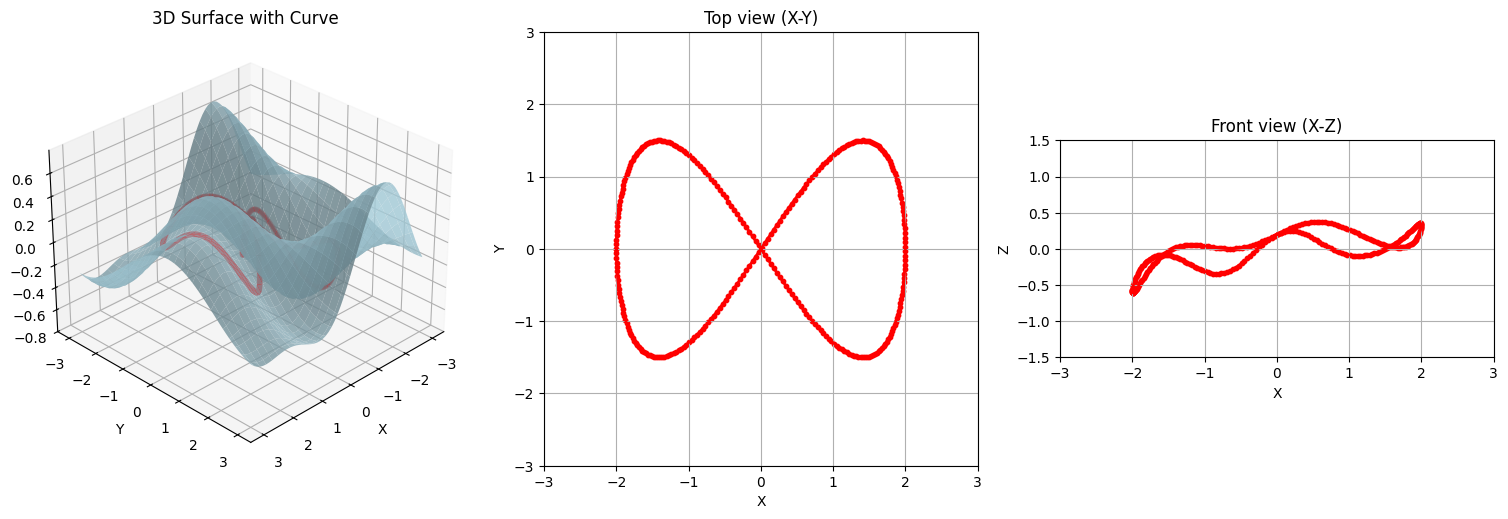

In [10]:
# Plotly

import numpy as np
import plotly.graph_objects as go

# ------------------------------
# Define surface and curve
# ------------------------------
def f(x, y):
    return 0.5 * np.sin(x) * np.cos(y) + 0.2 * np.cos(2*x + y)

def x_of_t(t):
    return 2.0 * np.cos(t)

def y_of_t(t):
    return 1.5 * np.sin(2*t)

# Parametric t
t = np.linspace(-np.pi, np.pi, 300)

# 3D curve coordinates
curve_x = x_of_t(t)
curve_y = y_of_t(t)
curve_z = f(curve_x, curve_y)

# Surface grid
x = np.linspace(-3, 3, 60)
y = np.linspace(-3, 3, 60)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# ------------------------------
# Create Plotly figure
# ------------------------------
fig = go.Figure()

# Surface
fig.add_trace(go.Surface(
    x=X, y=Y, z=Z,
    colorscale='Blues',
    opacity=0.8,
    showscale=False
))

# 3D parametric curve
fig.add_trace(go.Scatter3d(
    x=curve_x, y=curve_y, z=curve_z,
    mode='lines+markers',
    line=dict(color='red', width=5),
    marker=dict(size=3, color='red'),
    name='Curve'
))

# Labels
fig.update_layout(
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z',
        xaxis=dict(nticks=6, range=[-3,3]),
        yaxis=dict(nticks=6, range=[-3,3]),
        zaxis=dict(nticks=6, range=[-1.5,1.5]),
    ),
    width=800,
    height=600,
    title="3D Parametric Curve on Surface"
)

fig.show()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------
# Define surface
# -----------------------------
def f(x, y):
    return 0.5 * np.sin(x) * np.cos(y) + 0.2 * np.cos(2*x + y)

x = np.linspace(-3, 3, 60)
y = np.linspace(-3, 3, 60)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# -----------------------------
# Parametric curve
# -----------------------------
t = np.linspace(-np.pi, np.pi, 300)
x_c = 2 * np.cos(t)
y_c = 1.5 * np.sin(2*t)
z_c = f(x_c, y_c)

# -----------------------------
# Create figure with 3 subplots
# -----------------------------
fig = plt.figure(figsize=(15,5))

# --- 3D Surface + curve ---
ax1 = fig.add_subplot(1,3,1, projection='3d')
ax1.plot_surface(X, Y, Z, color='lightblue', alpha=0.8, edgecolor='none')
ax1.plot(x_c, y_c, z_c, color='red', linewidth=2)
ax1.scatter(x_c, y_c, z_c, color='red', s=10)
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')
ax1.set_title('3D Surface with Curve')
ax1.view_init(elev=30, azim=45)  # initial 3D view

# --- Top view (XY projection) ---
ax2 = fig.add_subplot(1,3,2)
ax2.plot(x_c, y_c, color='red', linewidth=2)
ax2.scatter(x_c, y_c, color='red', s=10)
ax2.set_xlabel('X'); ax2.set_ylabel('Y')
ax2.set_title('Top view (X-Y)')
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True)
ax2.set_xlim([-3,3]); ax2.set_ylim([-3,3])

# --- Front view (XZ projection) ---
ax3 = fig.add_subplot(1,3,3)
ax3.plot(x_c, z_c, color='red', linewidth=2)
ax3.scatter(x_c, z_c, color='red', s=10)
ax3.set_xlabel('X'); ax3.set_ylabel('Z')
ax3.set_title('Front view (X-Z)')
ax3.set_aspect('equal', adjustable='box')
ax3.grid(True)
ax3.set_xlim([-3,3]); ax3.set_ylim([-1.5,1.5])

plt.tight_layout()
plt.show()



# Manim Visualization

In [8]:
from manim import *
import numpy as np

class SurfaceCurvePreviewAndProjection(ThreeDScene):
    def construct(self):
        # ------------------------------
        # Parametric surface and curve
        # ------------------------------
        def f(x, y):
            return 0.5*np.sin(x)*np.cos(y) + 0.2*np.cos(2*x + y)

        def x_of_t(t): return 2.0 * np.cos(t)
        def y_of_t(t): return 1.5 * np.sin(2*t)

        equation = MathTex(
            r"\vec{r}(t) = \big(x(t), y(t), f(x(t),y(t))\big) \, , \, "
            r"x(t)=2\cos t, \, y(t)=1.5 \sin 2t, \, f(x,y)=0.5\sin x \cos y + 0.2 \cos(2x+y)",
            font_size=28
        ).to_edge(UP).shift(DOWN*0.1)

        self.add_fixed_in_frame_mobjects(equation)

        def curve_point(t):
            return np.array([x_of_t(t), y_of_t(t), f(x_of_t(t), y_of_t(t))])

        x_range = (-3, 3)
        y_range = (-3, 3)
        t_min, t_max = -PI, PI

        # ------------------------------
        # 3D axes with labels
        # ------------------------------
        axes3d = ThreeDAxes(
            x_range=[x_range[0], x_range[1], 1],
            y_range=[y_range[0], y_range[1], 1],
            z_range=[-1.5, 1.5, 0.5],
            x_length=6, y_length=6, z_length=3,
        )
        x_label = axes3d.get_x_axis_label(Tex("x"))
        y_label = axes3d.get_y_axis_label(Tex("y"))
        z_label = axes3d.get_z_axis_label(Tex("z"))

        # ------------------------------
        # Surface + curve
        # ------------------------------
        surface = Surface(
            lambda u, v: np.array([u, v, f(u, v)]),
            u_range=x_range, v_range=y_range,
            resolution=(60, 60),
            fill_opacity=0.8,
            color=BLUE_D,
            stroke_color=BLUE_E,
            stroke_opacity=0.15
        )

        curve3d = ParametricFunction(
            curve_point,
            t_range=[t_min, t_max],
            color=RED,
            stroke_width=4
        )

        group3d = VGroup(axes3d, x_label, y_label, z_label, surface, curve3d)
        group3d.move_to(ORIGIN)

        # ------------------------------
        # 1️⃣ Initial Preview: rotate camera around 3D scene
        # ------------------------------
        self.set_camera_orientation(phi=65*DEGREES, theta=-45*DEGREES)
        self.add(group3d)
        self.play(FadeIn(surface, shift=IN), run_time=1)
        self.play(Create(curve3d), run_time=1.5)

        # Optional: rotate around scene to show full curve
        self.begin_ambient_camera_rotation(rate=TAU/20, about="theta")
        self.wait(4)
        self.stop_ambient_camera_rotation()

        # ------------------------------
        # 2️⃣ Move 3D scene to left & zoom out
        # ------------------------------
        self.play(
            group3d.animate.shift(LEFT*3).scale(0.7),
            run_time=1.5
        )

        # ------------------------------
        # 3️⃣ Setup for dot animation: top-down rotated view
        # ------------------------------
        # Top-down camera, 180° clockwise in XY plane
        self.set_camera_orientation(phi=0*DEGREES, theta=-90*DEGREES, gamma=0*DEGREES)

        t_tracker = ValueTracker(t_min)

        # Dot3D following the actual curve path exactly
        dot3d = Dot3D(color=RED, radius=0.08)
        self.add(dot3d)

        # ------------------------------
        # 4️⃣ 2D projections on right
        # ------------------------------
        def create_projection_axes(position, x_range, y_range, title_text):
            ax = Axes(
                x_range=x_range, y_range=y_range,
                x_length=5, y_length=3, tips=True
            ).move_to(position)
            title = Tex(title_text, font_size=28).next_to(ax, UP, buff=0.2)
            return ax, title

        ax_xy, title_xy = create_projection_axes(RIGHT*3 + UP*1.5, x_range, y_range, "Top view $(x,y)$")
        ax_xz, title_xz = create_projection_axes(RIGHT*3 + DOWN*1.5, x_range, [-1.5, 1.5, 0.5], "Front view $(x,z)$")

        # Projection curves
        top_curve = ax_xy.plot_parametric_curve(
            lambda t: np.array([x_of_t(t), y_of_t(t)]),
            t_range=[t_min, t_max], color=RED, stroke_width=3
        )
        front_curve = ax_xz.plot_parametric_curve(
            lambda t: np.array([x_of_t(t), f(x_of_t(t), y_of_t(t))]),
            t_range=[t_min, t_max], color=RED, stroke_width=3
        )

        # Projection dots following the dot3d
        dot_xy = always_redraw(lambda: Dot(
            ax_xy.c2p(x_of_t(t_tracker.get_value()), y_of_t(t_tracker.get_value())),
            radius=0.055, color=RED
        ))
        dot_xz = always_redraw(lambda: Dot(
            ax_xz.c2p(x_of_t(t_tracker.get_value()), f(x_of_t(t_tracker.get_value()), y_of_t(t_tracker.get_value()))),
            radius=0.055, color=RED
        ))

        # Bring in projections
        self.play(LaggedStart(
            Create(ax_xy), Create(ax_xz),
            FadeIn(title_xy, shift=UP*0.2),
            FadeIn(title_xz, shift=UP*0.2),
            lag_ratio=0.15, run_time=1.5
        ))
        self.play(Create(top_curve), Create(front_curve), run_time=1.5)
        self.add(dot_xy, dot_xz)

        # ------------------------------
        # 5️⃣ Animate dot along 3D curve (MoveAlongPath)
        # ------------------------------
        self.play(
            t_tracker.animate.set_value(t_max),
            MoveAlongPath(dot3d, curve3d),
            run_time=6,
            rate_func=linear
        )

        self.wait()



%manim -ql -v ERROR SurfaceCurvePreviewAndProjection

Manim Community v0.19.0